In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
Movies_dataset = pd.read_csv('/content/IMDb Movies India.csv', encoding = 'latin1')

In [3]:
Movies_dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
Movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
Movies_dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# Check for null values
Movies_dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# Check for Missing values
Movies_dataset.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
# Check for duplicates
Movies_dataset.duplicated().sum()

6

In [10]:
# Remove Duplicates
Movies_dataset.drop_duplicates(inplace = True)

In [12]:
# Drop NaN values
Movies_dataset.dropna(inplace = True)

In [13]:
Movies_dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
# Convert 'Year' & 'Votes' into Integers
Movies_dataset['Year'] = Movies_dataset['Year'].str.strip('()').astype(int)
Movies_dataset['Votes'] = Movies_dataset['Votes'].str.replace(',','').astype('int')

In [17]:
Movies_dataset['Duration'] = Movies_dataset['Duration'].str.strip('min')

In [19]:
# Dropn the 'Name' Column from the dataset
Movies_dataset.drop('Name',axis=1,inplace=True)

In [20]:
Movies_dataset.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


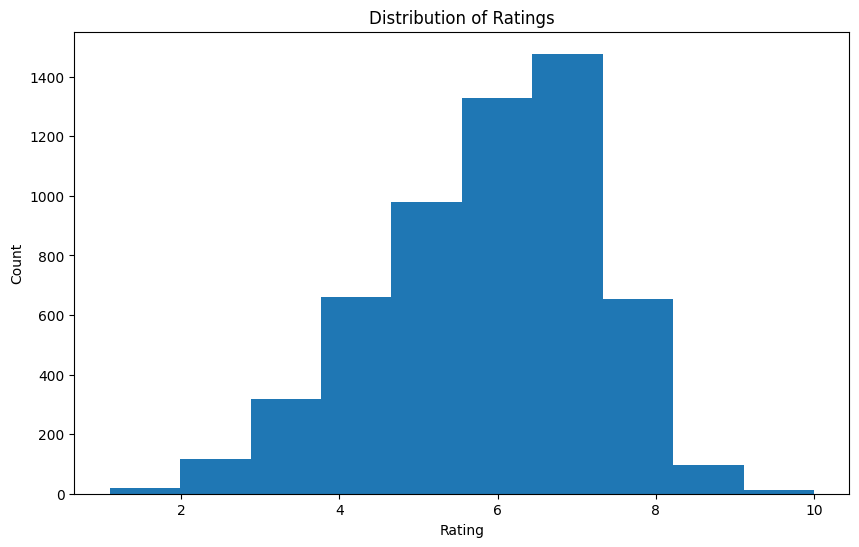

In [21]:
# Plot the distribution of Rating
plt.figure(figsize = (10, 6))
plt.hist(Movies_dataset['Rating'], bins = 10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

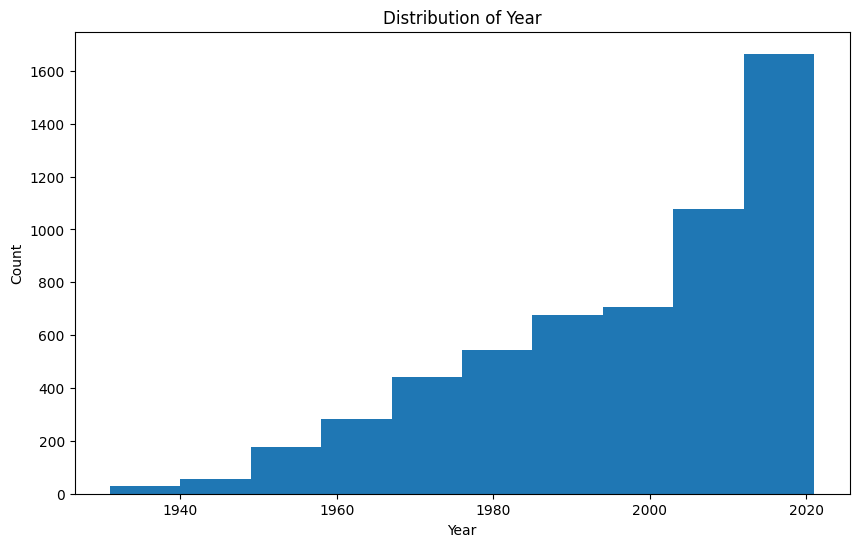

In [22]:
# Plot the distribution of year
plt.figure(figsize = (10, 6))
plt.hist(Movies_dataset['Year'], bins = 10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

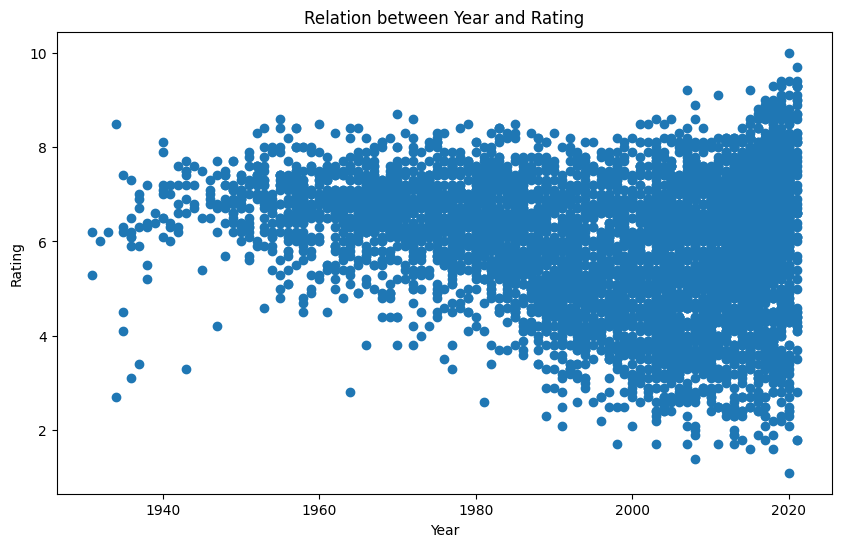

In [23]:
# Plot the realtion between Year and Rating
plt.figure(figsize = (10, 6))
plt.scatter(Movies_dataset['Year'], Movies_dataset['Rating'])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Relation between Year and Rating')
plt.show()

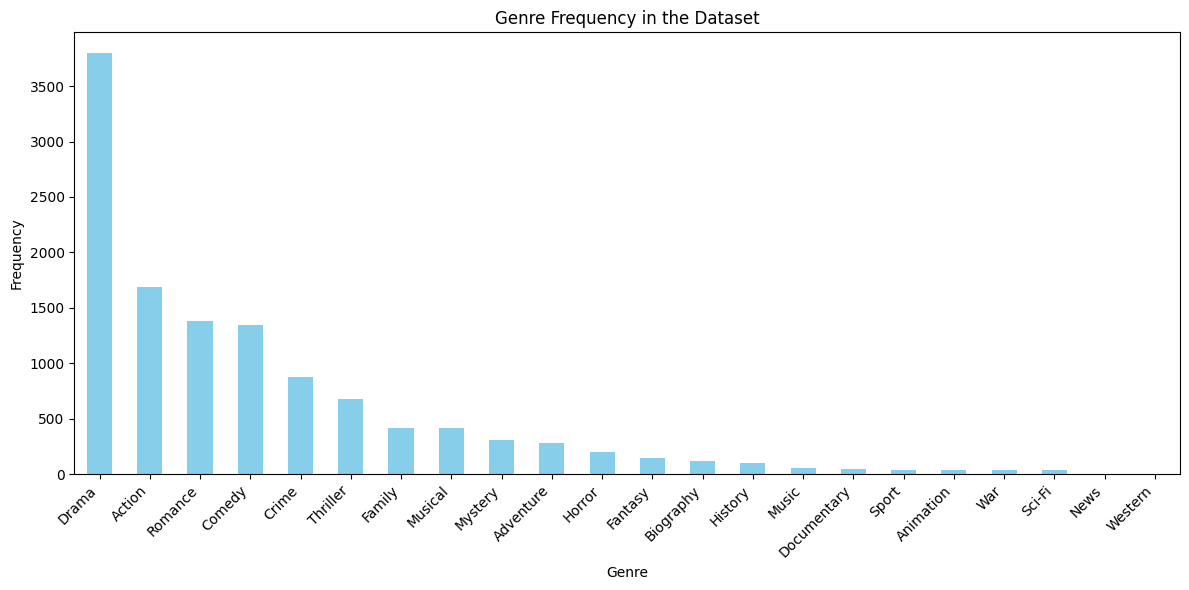

In [24]:
# Plot the Genre Frequency in the data
# Split genres into individual values
genres = Movies_dataset['Genre'].str.split(', ').explode()

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequency in the Dataset')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

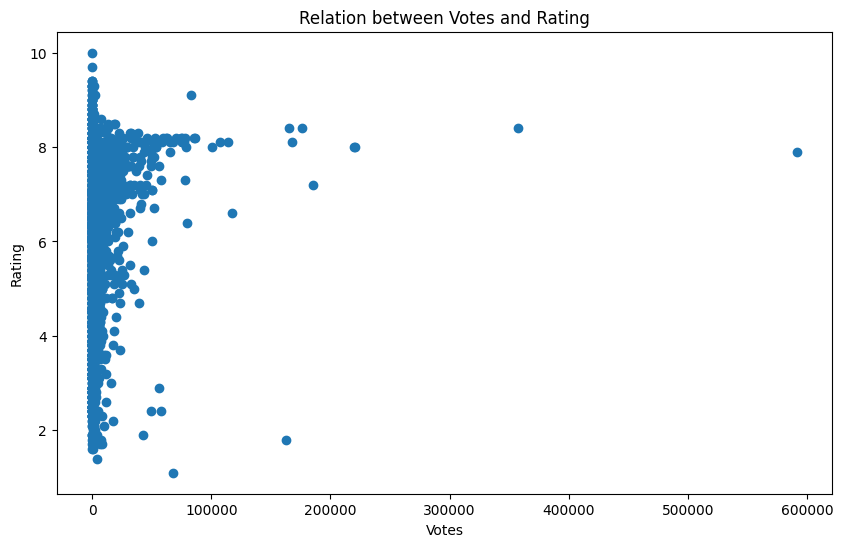

In [28]:
# Plot the relation between Votes and Rating
plt.figure(figsize = (10, 6))
plt.scatter(Movies_dataset['Votes'], Movies_dataset['Rating'])
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Relation between Votes and Rating')
plt.show()

In [29]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Movies_dataset['Genre'] = le.fit_transform(Movies_dataset['Genre'])
Movies_dataset['Actor 1'] = le.fit_transform(Movies_dataset['Actor 1'])
Movies_dataset['Actor 2'] = le.fit_transform(Movies_dataset['Actor 2'])
Movies_dataset['Actor 3'] = le.fit_transform(Movies_dataset['Actor 3'])
Movies_dataset['Director'] = le.fit_transform(Movies_dataset['Director'])

In [31]:
Movies_dataset.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [32]:
X = Movies_dataset.drop('Rating', axis = 1)
y = Movies_dataset['Rating']
print('Matrix of Features: ', X)
print('Dependent Variable: ', y)

Matrix of Features:         Year Duration  Genre  Votes  Director  Actor 1  Actor 2  Actor 3
1      2019     109     229      8       629     1352     2272      319
3      2019     110     184     35      1335     1198      719     2148
5      1997     147     157    827      1530      378       75     2045
6      2005     142     289   1086      2044      692     1112     2524
8      2012      82     320    326       135     1934     1175     1013
...     ...      ...    ...    ...       ...      ...      ...      ...
15493  2015     115     229    408      1223     1861     1801     1615
15494  2001     153     133   1496      2059      763     1619     1184
15503  1989     125      28     44      1793      406      754     1685
15505  1999     129      38    655      1025      112     2164      314
15508  1998     130      38     20       895      468      753      303

[5659 rows x 8 columns]
Dependent Variable:  1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
    

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('X_train: ', X_train)
print('X_test: ', X_test)
print('y_train: ', y_train)
print('y_test: ', y_test)

X_train:         Year Duration  Genre  Votes  Director  Actor 1  Actor 2  Actor 3
707    1996     142     277    684      1374      643     1198     1172
6547   2012     150     201   5333      1034      514     1581      648
3175   2010     127     268    317      1881     1618     1712     2173
12173  2012     130     159   1345      1228      756      853     2071
8082   2014      63     284     17      1483     1491     1467     2238
...     ...      ...    ...    ...       ...      ...      ...      ...
10263  1979     120     248    159      1141      525     1388     1113
14280  2010      75     282     62      2103     1761     2268      991
14355  2005      88     354     35       437     1598     2115       57
14818  2018     135     142  12000      2002      761     1999     1388
2209   2003      95     316     24      1491      373     1852      214

[3961 rows x 8 columns]
X_test:         Year Duration  Genre  Votes  Director  Actor 1  Actor 2  Actor 3
10971  1990     159 

In [34]:
#Feature Engineering
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [36]:
# Defining models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': PolynomialFeatures(degree=2),
    'SVR': SVR(kernel='linear'),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [37]:
# Training and evaluation
results = {}
for name, model in models.items():
    if name == 'Polynomial Regression':
        poly_features = PolynomialFeatures(degree=2)
        X_poly_train = poly_features.fit_transform(X_train)
        X_poly_test = poly_features.transform(X_test)
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        predictions = model.predict(X_poly_test)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results[name] = rmse

In [38]:
# Finding the best model
best_model = min(results, key=results.get)
best_rmse = results[best_model]

In [39]:
# Print results
print("Results:")
for name, rmse in results.items():
    print(f"{name} RMSE: {rmse}")

print(f"\nBest Model: {best_model} (RMSE: {best_rmse})")

Results:
Linear Regression RMSE: 1.2937464315251126
Polynomial Regression RMSE: 1.2634372329220716
SVR RMSE: 1.3275746181961356
Decision Tree Regression RMSE: 1.5965768741149846
Random Forest Regression RMSE: 1.106895132571821

Best Model: Random Forest Regression (RMSE: 1.106895132571821)


In [40]:
# Tune the hyperparameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
# Initialize the Random Forest Regression model
rf_model_tuned = RandomForestRegressor(random_state=42)

In [42]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [44]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [45]:
# Train the model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [46]:
# Make predictions
best_rf_predictions = best_rf_model.predict(X_test)

In [48]:
# Calculate RMSE
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
best_rf_rmse

1.103345908616346

In [49]:
# make a prediction
# Reshape the input data into a 2D array
input_data = np.array([2019, 109, 229, 8, 629, 1352, 2272, 319]).reshape(1, -1)

input_data_scaled = sc.transform(input_data)

# Make predictions using the reshaped data
predicted_value = best_rf_model.predict(input_data_scaled)

# Print the predicted value
print(predicted_value)

[6.87314244]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
